In [70]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import turicreate as tc

import pandas as pd

In [12]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
house_data = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sf = tc.SFrame('m_1ce96d9d245ca490.frame_idx')

In [13]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    assert degree >= 1
    # initialize the SFrame:
    poly_sframe = tc.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            poly_sframe[name] = np.power(feature, power)
    return poly_sframe

In [18]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sf.sort(['sqft_living','price'])
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
poly2_data['price'] = sales['price']
poly3_data['price'] = sales['price']
poly15_data['price'] = sales['price']
features_15 = []
for i in range(15):
    features_15.append('power_' + str(i + 1))
print(features_15)

['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']


In [19]:
model1 = tc.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)
model2 = tc.linear_regression.create(poly2_data, target = 'price', features = ['power_1','power_2'], validation_set = None)
model3 = tc.linear_regression.create(poly3_data, target = 'price', features = ['power_1','power_2','power_3'], validation_set = None)
model15 = tc.linear_regression.create(poly15_data, target = 'price', features = features_15, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.325728     | 4362074.696077     | 261440.790724                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.691514     | 5913020.984255     | 250948.368758                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.774836     | 3261066.736008     | 249261.286346                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.283670     | 2662308.584341     | 245690.511190                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

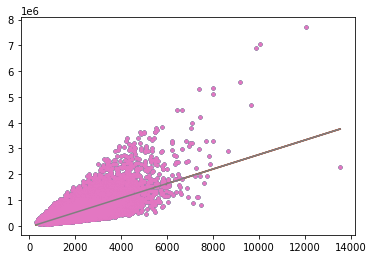

In [20]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
poly1_data['power_1'], model1.predict(poly1_data),'-')


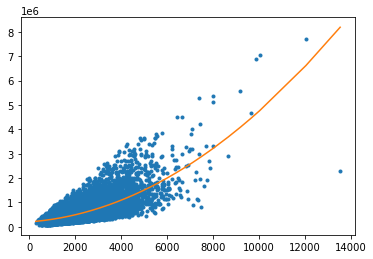

In [24]:
plt.plot(poly2_data['power_1'],poly1_data['price'],'.',
poly2_data['power_1'], model2.predict(poly2_data),'-')


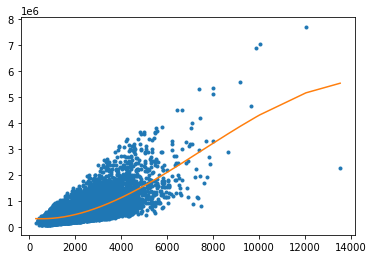

In [25]:
plt.plot(poly3_data['power_1'],poly1_data['price'],'.',
poly3_data['power_1'], model3.predict(poly3_data),'-')


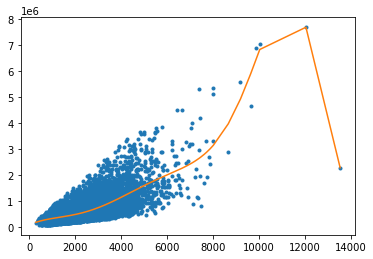

In [26]:
plt.plot(poly15_data['power_1'],poly1_data['price'],'.',
poly15_data['power_1'], model15.predict(poly15_data),'-')

In [29]:
train_set, test_set = sf.random_split(0.5, seed = 0)
set_1, set_2 = train_set.random_split(0.5, seed = 0)
set_3, set_4 = test_set.random_split(0.5, seed = 0)

In [31]:
set_1_data = set_1.sort(['sqft_living','price'])
set_1_data_15 = polynomial_sframe(set_1_data['sqft_living'], 15)
set_1_data_15['price'] = set_1_data['price']

set_2_data = set_2.sort(['sqft_living','price'])
set_2_data_15 = polynomial_sframe(set_2_data['sqft_living'], 15)
set_2_data_15['price'] = set_2_data['price']

set_3_data = set_3.sort(['sqft_living','price'])
set_3_data_15 = polynomial_sframe(set_3_data['sqft_living'], 15)
set_3_data_15['price'] = set_3_data['price']

set_4_data = set_4.sort(['sqft_living','price'])
set_4_data_15 = polynomial_sframe(set_4_data['sqft_living'], 15)
set_4_data_15['price'] = set_4_data['price']



In [32]:
model_set1 = tc.linear_regression.create(set_1_data_15, target = 'price', features = features_15, validation_set = None)
model_set2 = tc.linear_regression.create(set_2_data_15, target = 'price', features = features_15, validation_set = None)
model_set3 = tc.linear_regression.create(set_3_data_15, target = 'price', features = features_15, validation_set = None)
model_set4 = tc.linear_regression.create(set_4_data_15, target = 'price', features = features_15, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.690364     | 2130140.305894     | 249425.872950                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.561038     | 2482962.919033     | 244455.865617                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.668970     | 2588434.073115     | 243485.577974                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.672347     | 2441990.974217     | 241730.723335                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

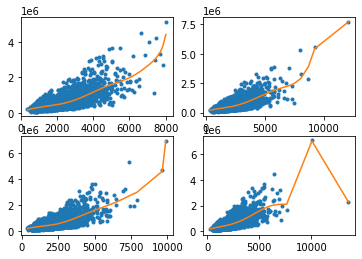

In [33]:
plt.subplot(2,2,1)
plt.plot(set_1_data_15['power_1'],set_1_data_15['price'],'.',
set_1_data_15['power_1'], model_set1.predict(set_1_data_15),'-')

plt.subplot(2,2,2)
plt.plot(set_2_data_15['power_1'],set_2_data_15['price'],'.',
set_2_data_15['power_1'], model_set2.predict(set_2_data_15),'-')

plt.subplot(2,2,3)
plt.plot(set_3_data_15['power_1'],set_3_data_15['price'],'.',
set_3_data_15['power_1'], model_set3.predict(set_3_data_15),'-')

plt.subplot(2,2,4)
plt.plot(set_4_data_15['power_1'],set_4_data_15['price'],'.',
set_4_data_15['power_1'], model_set4.predict(set_4_data_15),'-')

In [59]:
model_set1.coefficients[15]

{'name': 'power_15',
 'index': None,
 'value': 3.9028564331308005e-51,
 'stderr': 5.048299884127602e-48}

In [60]:
model_set2.coefficients[15]

{'name': 'power_15',
 'index': None,
 'value': -1.3259906030565653e-54,
 'stderr': nan}

In [61]:
model_set3.coefficients[15]

{'name': 'power_15',
 'index': None,
 'value': 1.1248649060801232e-52,
 'stderr': 9.979018733543201e-49}

In [62]:
model_set4.coefficients[15]

{'name': 'power_15',
 'index': None,
 'value': -1.804567724895323e-54,
 'stderr': nan}

In [66]:
training_and_validation, testing = sf.random_split(0.9, seed = 1)
training, validation = training_and_validation.random_split(0.5, seed = 1)


In [67]:
data = training.sort(['sqft_living','price'])
data_test = validation.sort(['sqft_living','price'])
RSS = 0
record_power = 0
modellst = []
for power in range(1, 16):
    tmp_data = polynomial_sframe(data['sqft_living'], power)
    tmp_data['price'] = data['price']
    valid_data = polynomial_sframe(data_test['sqft_living'], power)
    valid_data['price'] = data_test['price']
    my_fea = []
    for i in range(1, power + 1):
        my_fea.append("power_" + str(i)) 
    
    model =  tc.linear_regression.create(tmp_data, target = 'price', features = my_fea, validation_set = None, verbose = False)
    modellst.append(model)
    RSS_temp = np.sum(np.square(np.subtract(model.predict(valid_data), valid_data['price'])))
    print("{}, power = {}".format(RSS_temp, power))
    if RSS == 0 or RSS_temp < RSS:
        RSS = RSS_temp
        record_power = power
print(RSS)
print(record_power)

629097392476828.0, power = 1
623953218718226.4, power = 2
625827565374357.4, power = 3
629941747474427.8, power = 4
620917933481882.8, power = 5
563138360214930.8, power = 6
661891178629744.1, power = 7
931498626810433.0, power = 8
1291277802250697.8, power = 9
1568816709506370.5, power = 10
1548252159210264.0, power = 11
1145157098454246.8, power = 12
626265431773296.0, power = 13
930709387179546.8, power = 14
4144343609603641.5, power = 15
563138360214930.8
6


In [68]:
print("%.3E" % RSS)

5.631E+14


In [71]:
testing_test = testing.sort(['sqft_living','price'])
testing_data = polynomial_sframe(testing_test['sqft_living'], 6)
testing_data['price'] = testing_test['price']
my_fea = []
for i in range(1, 6 + 1):
    my_fea.append("power_" + str(i))
RSS_6 = np.sum(np.square(np.subtract(modellst[5].predict(testing_data), testing_data['price'])))
print("%.3E" % RSS_6)

1.347E+14
